In [1]:
%cd Documents/GitHub/Youshi_Wang-s-repo/IE517_Srping2023_HW7

C:\Users\Jerry\Documents\GitHub\Youshi_Wang-s-repo\IE517_Srping2023_HW7


 1) PAY_0                          0.096317
 2) AGE                            0.066705
 3) BILL_AMT1                      0.060503
 4) LIMIT_BAL                      0.059812
 5) BILL_AMT2                      0.054086
 6) BILL_AMT3                      0.051823
 7) PAY_AMT1                       0.050797
 8) BILL_AMT6                      0.050511
 9) BILL_AMT4                      0.050234
10) BILL_AMT5                      0.050129
11) PAY_AMT2                       0.047751
12) PAY_AMT3                       0.046706
13) PAY_2                          0.046664
14) PAY_AMT6                       0.046016
15) PAY_AMT5                       0.043445
16) PAY_AMT4                       0.043360
17) PAY_3                          0.026677
18) PAY_4                          0.022828
19) PAY_5                          0.020489
20) EDUCATION                      0.020420
21) PAY_6                          0.018584
22) MARRIAGE                       0.014039
23) SEX                         

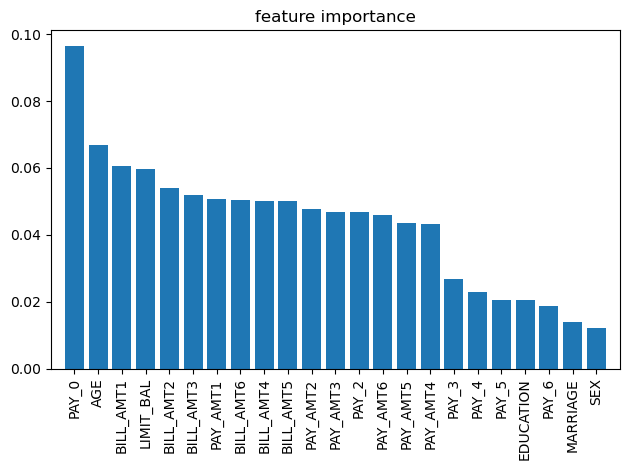

My name is Youshi Wang
My NetID is: youshiw2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('ccdefault.csv',index_col=['ID'])
x=df.iloc[:,:23]
y=df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

forest25=RandomForestClassifier(criterion='gini',
                          n_estimators=25,
                          random_state=1,
                          n_jobs=2)
score_train25=cross_val_score(forest25,X_train,y_train,cv=cv).mean()
score_test25=cross_val_score(forest25,X_test,y_test,cv=cv).mean()

forest50=RandomForestClassifier(criterion='gini',
                          n_estimators=50,
                          random_state=1,
                          n_jobs=2)
score_train50=cross_val_score(forest50,X_train,y_train,cv=cv).mean()
score_test50=cross_val_score(forest50,X_test,y_test,cv=cv).mean()

forest200=RandomForestClassifier(criterion='gini',
                          n_estimators=200,
                          random_state=1,
                          n_jobs=2)
score_train200=cross_val_score(forest200,X_train,y_train,cv=cv).mean()
score_test200=cross_val_score(forest200,X_test,y_test,cv=cv).mean()

forest500=RandomForestClassifier(criterion='gini',
                          n_estimators=500,
                          random_state=1,
                          n_jobs=2)
score_train500=cross_val_score(forest500,X_train,y_train,cv=cv).mean()
score_test500=cross_val_score(forest500,X_test,y_test,cv=cv).mean()

forest1000=RandomForestClassifier(criterion='gini',
                          n_estimators=1000,
                          random_state=1,
                          n_jobs=2)
score_train1000=cross_val_score(forest1000,X_train,y_train,cv=cv).mean()
score_test1000=cross_val_score(forest1000,X_test,y_test,cv=cv).mean()

#%% feature importance
forest500.fit(X_train,y_train)
importances=forest500.feature_importances_
labels=df.columns[:23]
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            labels[indices[f]],
                            importances[indices[f]]))
          
import matplotlib.pyplot as plt
plt.title('feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

print("My name is Youshi Wang")
print("My NetID is: youshiw2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
